# Fusion paper story line (with Model4 only - separate kappa)

This script demonstrates the logical sequence of the results section in fusion paper with only considering independent arrangemnet model + VMF emission model (separate kappa) combination, which refers to Model 4 for short.

## 1. Improving individual maps by integrating group prior

In [20]:
import sys
sys.path.append("..")
from ProbabilisticParcellation.evaluate_da import *
from ProbabilisticParcellation.util import *
from Functional_Fusion.dataset import * 
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

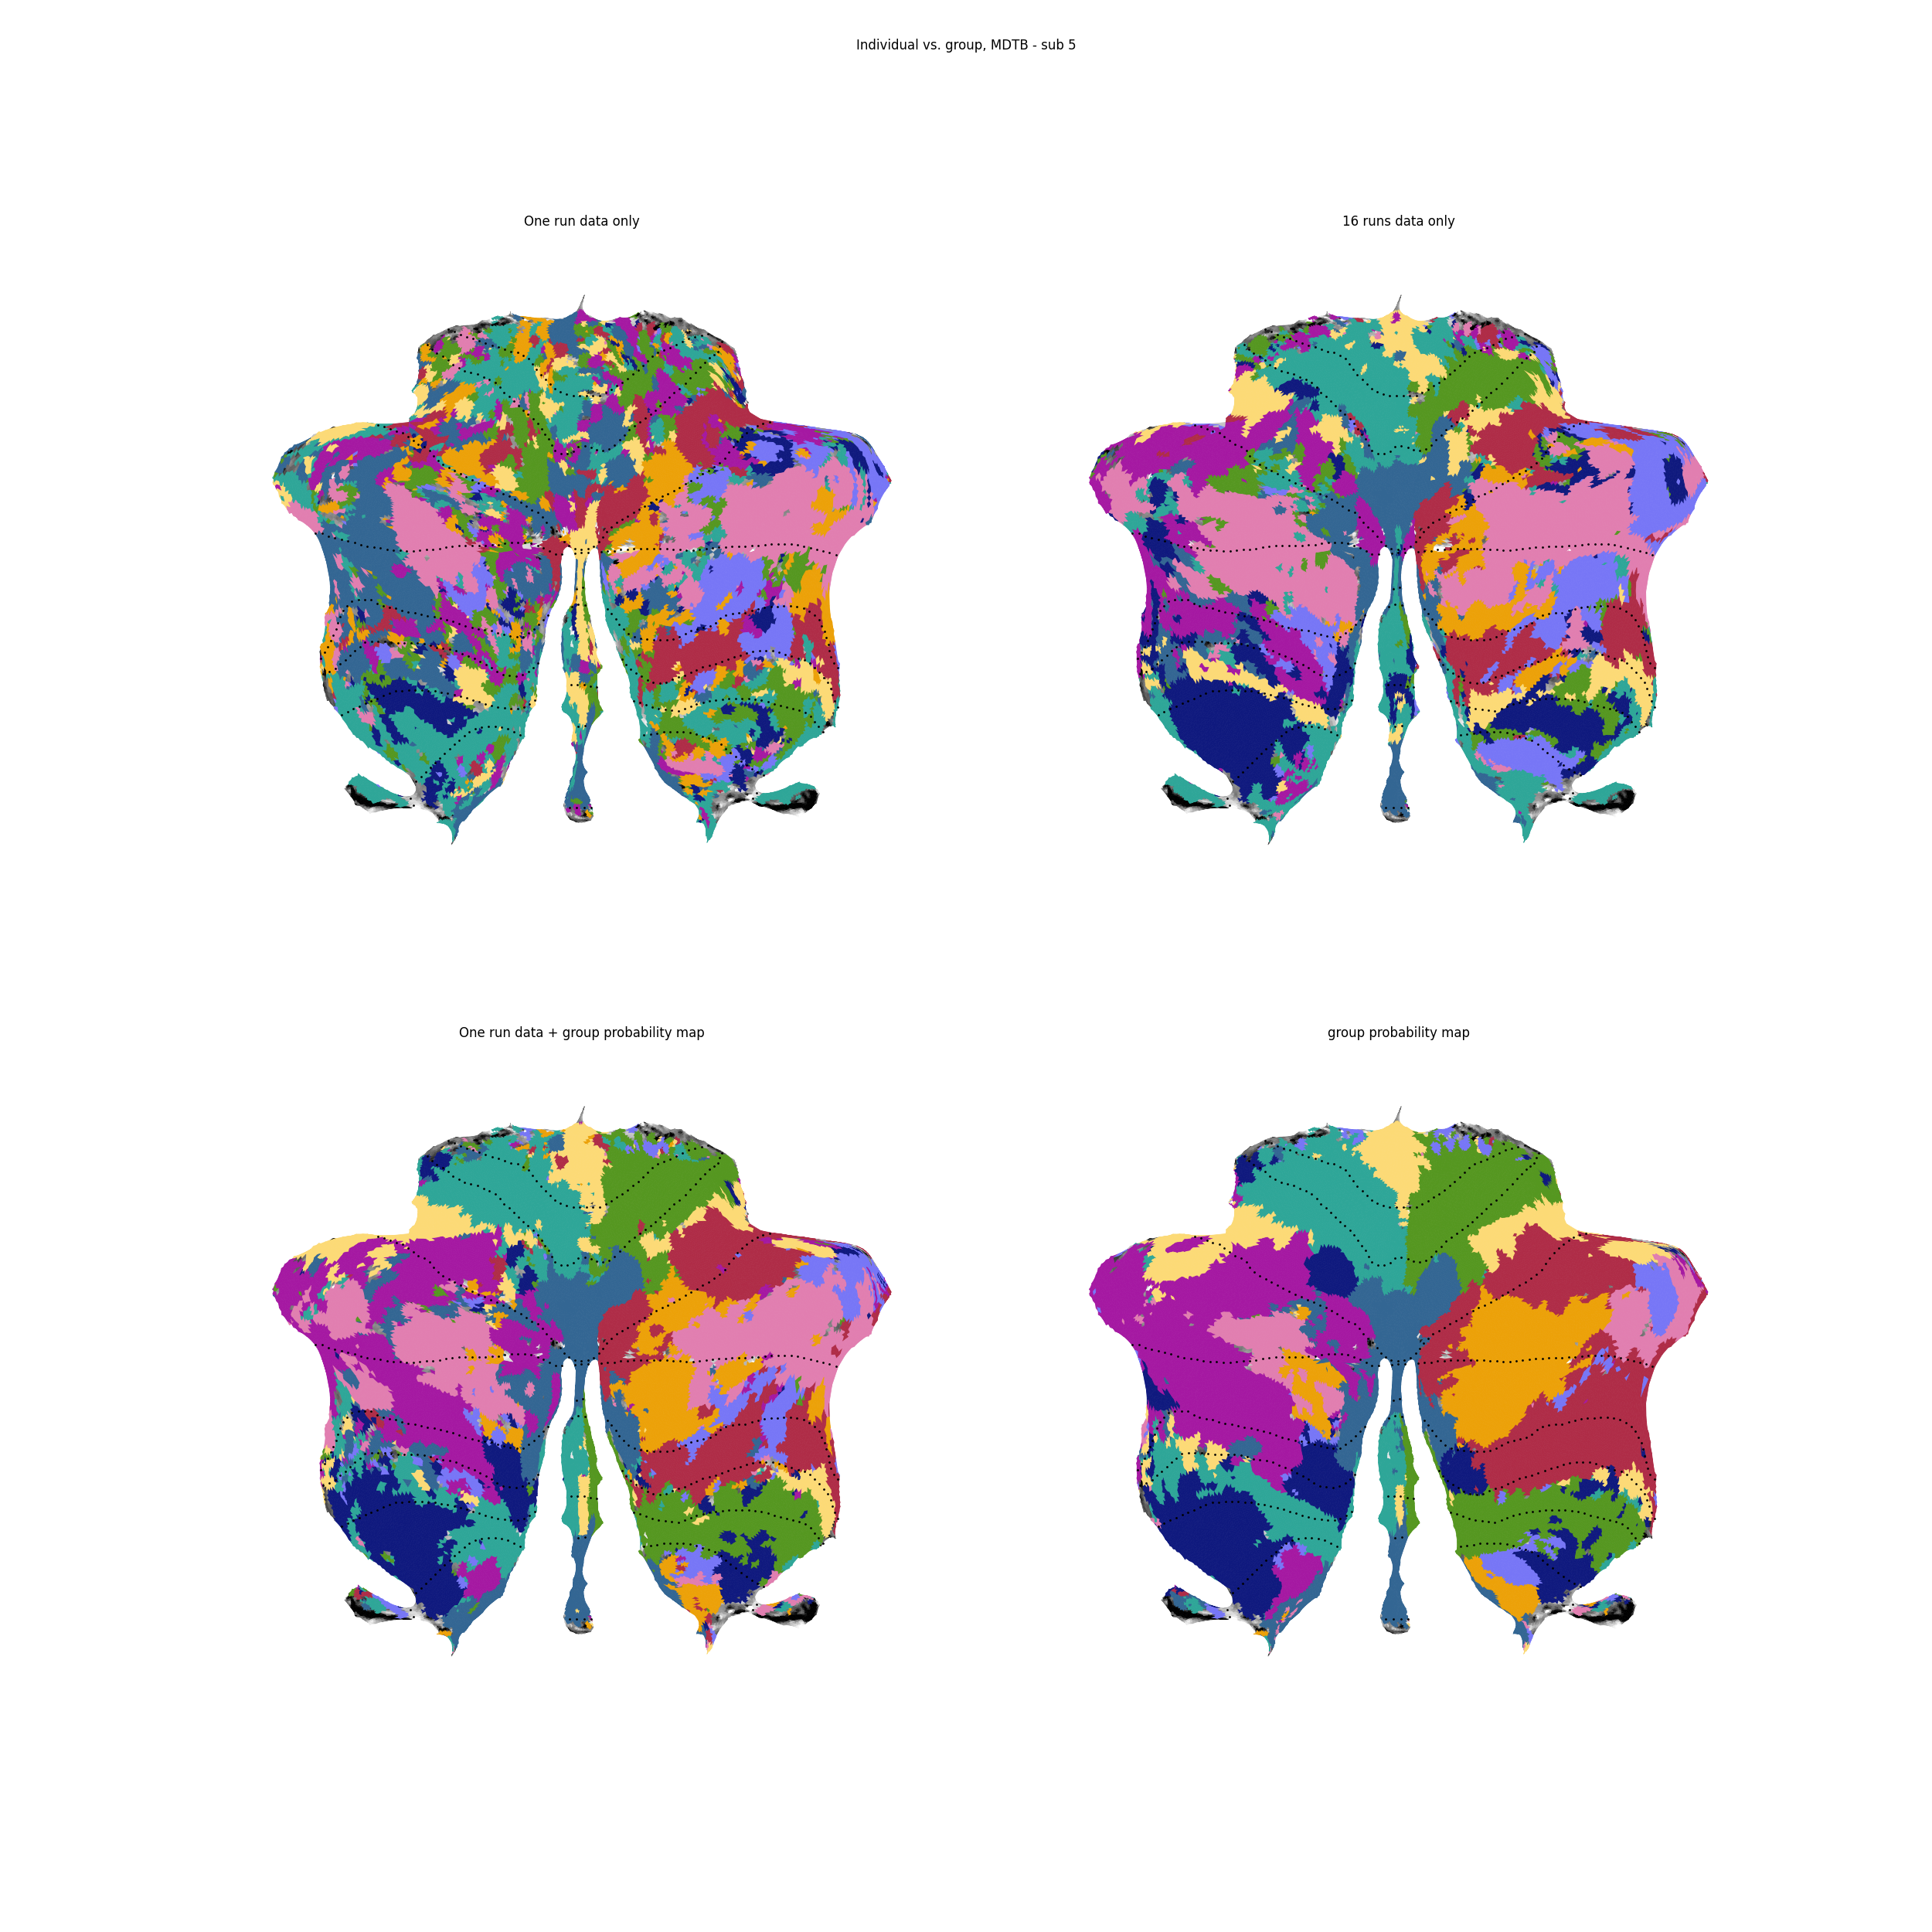

In [4]:
from IPython import display

img = model_dir + f'/Results/1.indiv_vs_group/subject_plots/indiv_group_plot_sub_5.png'
display.Image(img)

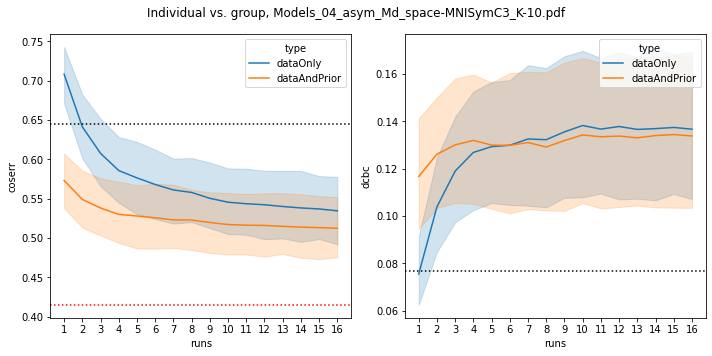

In [2]:
model_type = 'Models_04'
model_name = 'asym_Md_space-MNISymC3_K-10'
fname = model_dir + f'/Results/1.indiv_vs_group/eval_{model_type}_{model_name}.tsv'
result_1_plot_curve(fname, oname=model_type + f'_{model_name}.pdf')

The DCBC curve is not good, we probably need to use k=17 as example in model 4 only story

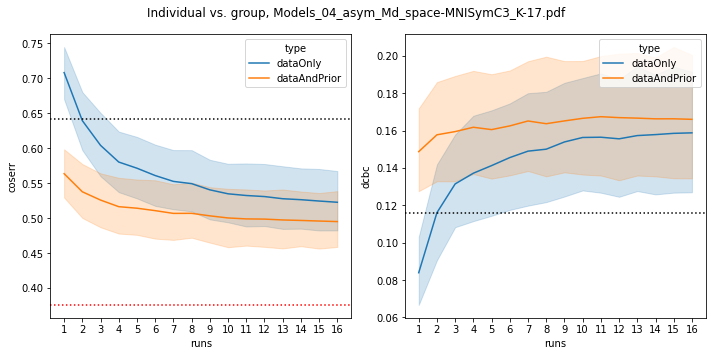

In [21]:
model_type = 'Models_04'
model_name = 'asym_Md_space-MNISymC3_K-17'
fname = model_dir + f'/Results/1.indiv_vs_group/eval_{model_type}_{model_name}.tsv'
result_1_plot_curve(fname, oname=model_type + f'_{model_name}.pdf')

## 2. Simulation - The proposed model does fusion on two synthetic datasets

In this section, we want to testify the framework can do fusion through the synthetic datasets in two scenarios, (a) the synthetic datasets are relevant (like two imaging datasets that all emphasis the motor tasks), and (b) the synthetic datasets are irrelevant (like one motor dataset and one language dataset). Then we validate and compare the model fusion results in these two types.

The options to present: 1. To simulate two datasets fusion without considering relevant/irrelevant; 2. with considering relevant/irrelevant.

### Option 1: Without considering the datasets to be fused are relevant or irrelevant domain.

#### For model 4 only, fusion works in overall.

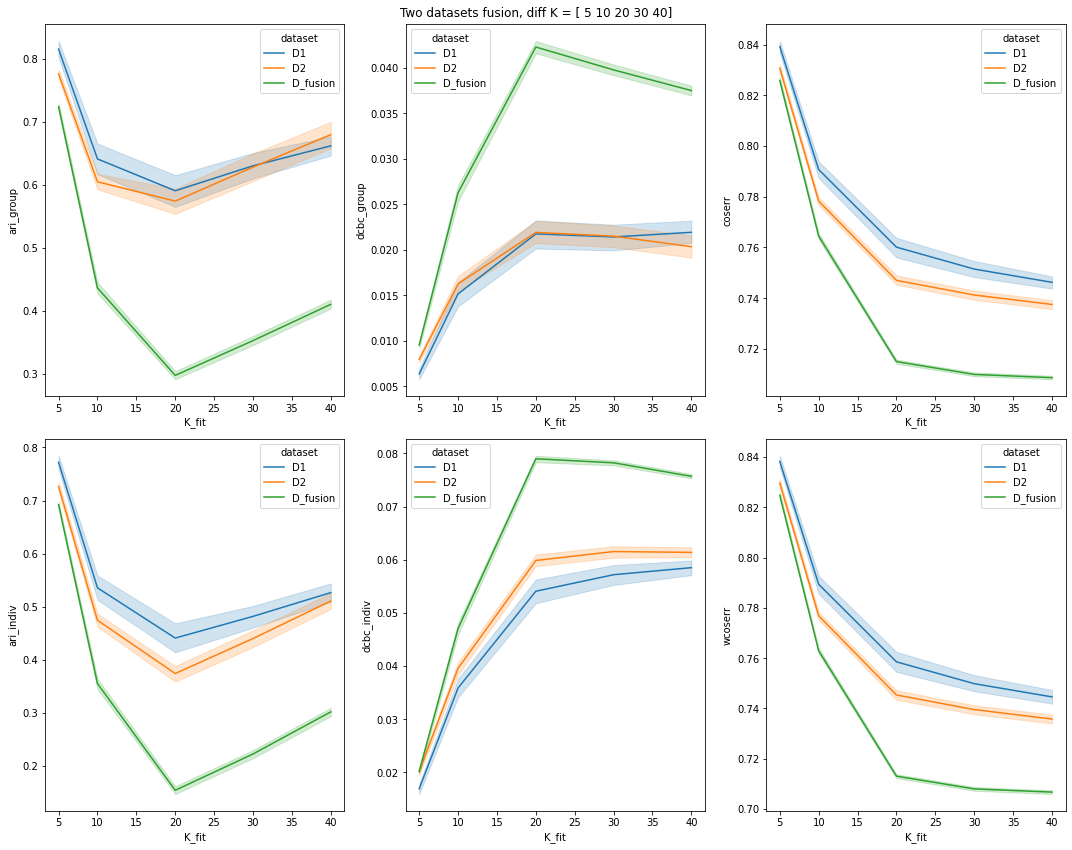

In [3]:
def _plot_diffK(fname, hue="dataset", style=None):
    D = pd.read_csv(fname, delimiter='\t')
    D = D.loc[D.common_kappa == False]
    plt.figure(figsize=(15,12))
    crits = ['ari_group','dcbc_group','coserr',
             'ari_indiv','dcbc_indiv','wcoserr']
    for i, c in enumerate(crits):
        plt.subplot(2, 3, i + 1)
        if style is not None:
            sb.lineplot(data=D, x="K_fit", y=c, hue=hue, style=style,
                        style_order=D[style].unique(),markers=True)
        else:
            sb.lineplot(data=D, x="K_fit", y=c, hue=hue, markers=True)

    plt.suptitle(f'Two datasets fusion, diff K = {D.K_fit.unique()}')
    plt.tight_layout()
    plt.show()

fname = model_dir + f'/Results/2.simulation/eval_Ktrue_20_Kfit_5to40.tsv'
_plot_diffK(fname)

### Option 2: With considering relevant or irrelevant domain.

**In model 4, fusion always work when the two datasets are relevant or irrelevant**

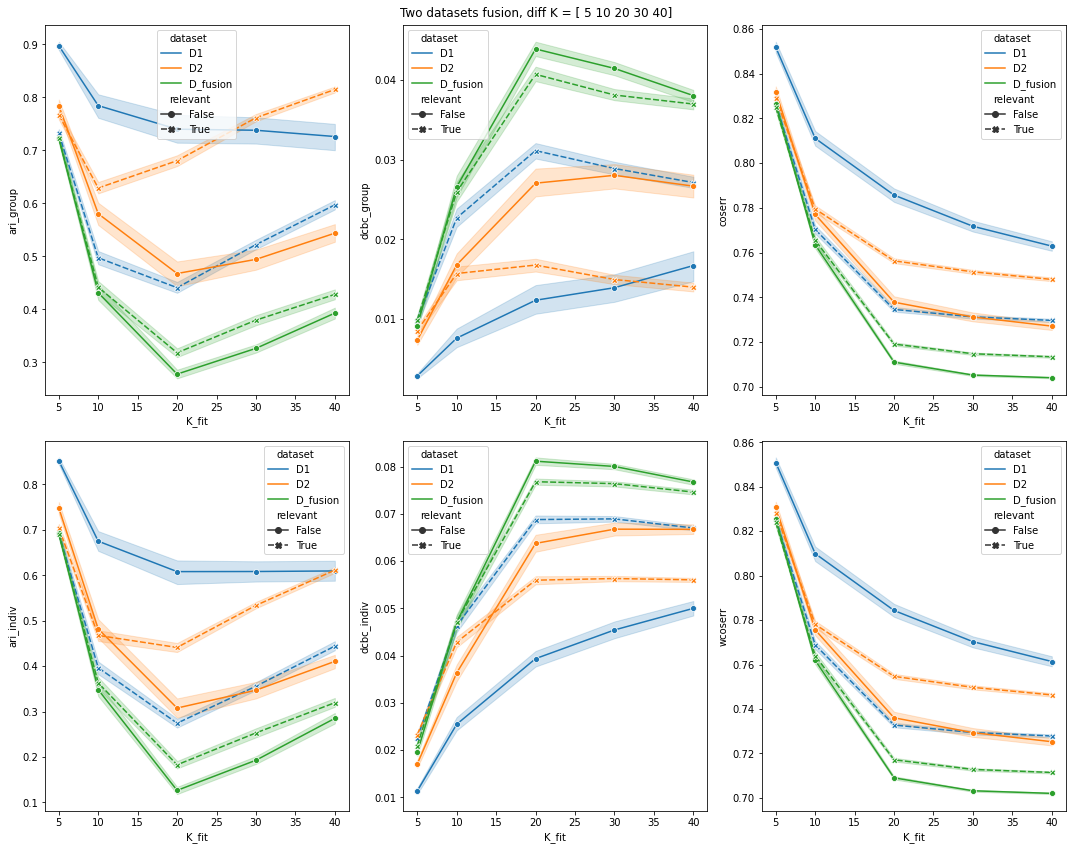

In [8]:
fname = model_dir + f'/Results/2.simulation/eval_Ktrue_20_Kfit_5to40.tsv'
_plot_diffK(fname, style='relevant')

### Two relevant datasets fusion

In [19]:
%%capture
from generativeMRF.notebooks.simulate_fusion import *

# res = simulation_3(K_true=20, K=5, width=50, nsub_list=np.array([10, 10]),M=np.array([40, 20], dtype=int),
#                    num_part=1, sigma2=[0.2, 0.8], iter=1)

U_p, fit = [], []
for k in [5,10,20]:
    grid, U, U_prior, U_indv, Props, _, _ = do_sessFusion_diffK(K_true=10, K=k, M=np.array([40, 20]), 
                                                                nsubj_list=np.array([10, 10]), num_part=1,
                                                                width=50, low=1.1, high=1.1, sigma2=[0.2,0.8],
                                                                plot_trueU=False, relevant=True)
    fit.append(Props[1])
    U_p.append(U_prior)

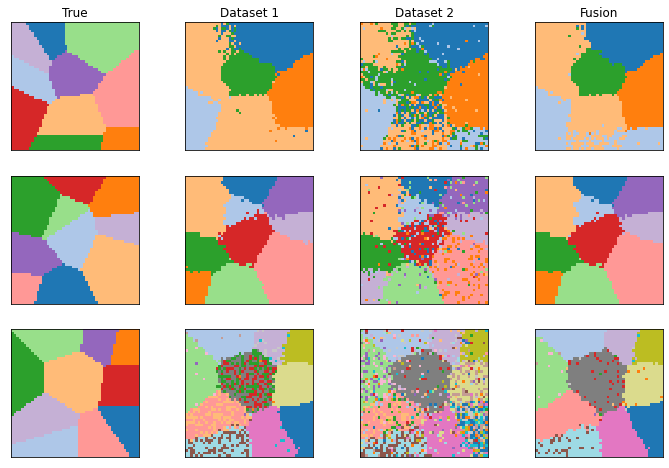

In [21]:
row = len(fit)
col = 4
names = ["True", "Dataset 1", "Dataset 2", "Fusion"]
ylabels=["K=5","K=10","K=20"]

plt.figure(figsize=(12,8))
for i, m in enumerate(fit):
    for j in range(len(m)+1):
        plt.subplot(row, col, i*col+j+1)
        if j == 0:
            parcel = pt.argmax(U_p[i][0], dim=0)
            plt.ylabel(ylabels[i])
        else:
            parcel = pt.argmax(m[j-1, :, :], dim=0)
        grid.plot_maps(parcel)
        if i == 0:
            plt.title(names[j])

plt.show()

### Two irrelevant datasets fusion

In [24]:
%%capture
from generativeMRF.notebooks.simulate_fusion import *

# res = simulation_3(K_true=20, K=5, width=50, nsub_list=np.array([10, 10]),M=np.array([40, 20], dtype=int),
#                    num_part=1, sigma2=[0.2, 0.8], iter=1)

U_p, fit = [], []
for k in [5,10,20]:
    grid, U, U_prior, U_indv, Props, _, _ = do_sessFusion_diffK(K_true=10, K=k, M=np.array([40, 20]), 
                                                                nsubj_list=np.array([10, 10]), num_part=1,
                                                                width=50, low=0.1, high=1.1, sigma2=[0.2,0.2],
                                                                plot_trueU=False, relevant=False)
    fit.append(Props[1])
    U_p.append(U_prior)

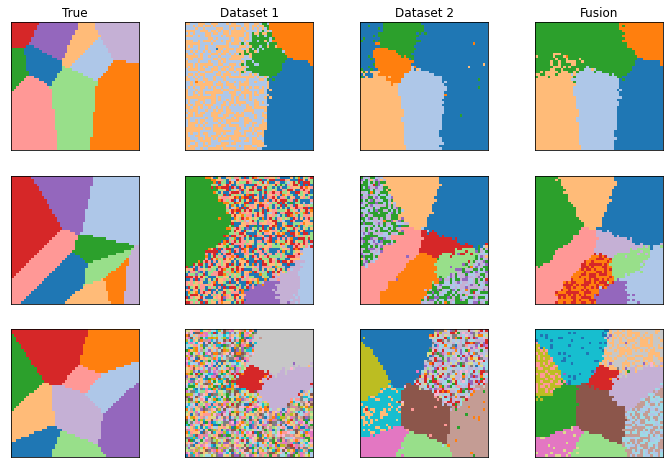

In [25]:
row = len(fit)
col = 4
names = ["True", "Dataset 1", "Dataset 2", "Fusion"]
ylabels=["K=5","K=10","K=20"]

plt.figure(figsize=(12,8))
for i, m in enumerate(fit):
    for j in range(len(m)+1):
        plt.subplot(row, col, i*col+j+1)
        if j == 0:
            parcel = pt.argmax(U_p[i][0], dim=0)
            plt.ylabel(ylabels[i])
        else:
            parcel = pt.argmax(m[j-1, :, :], dim=0)
        grid.plot_maps(parcel)
        if i == 0:
            plt.title(names[j])

plt.show()

## 3. Confirm the simulation on real datasets (IBC 14 sessions)

D:\python_workspace\Functional_Fusion\dataset.py:390: UserWarning: sub-11, ses-preference, CondHalf - missing data painting_constant-half2
  warnings.warn(f'{s}, {ses_id}, {type} - missing data {base[j]}')
D:\python_workspace\Functional_Fusion\dataset.py:217: RuntimeWarning: invalid value encountered in true_divide
  r[s,pn,:] = nansum(X1*X2,axis=0)/ \


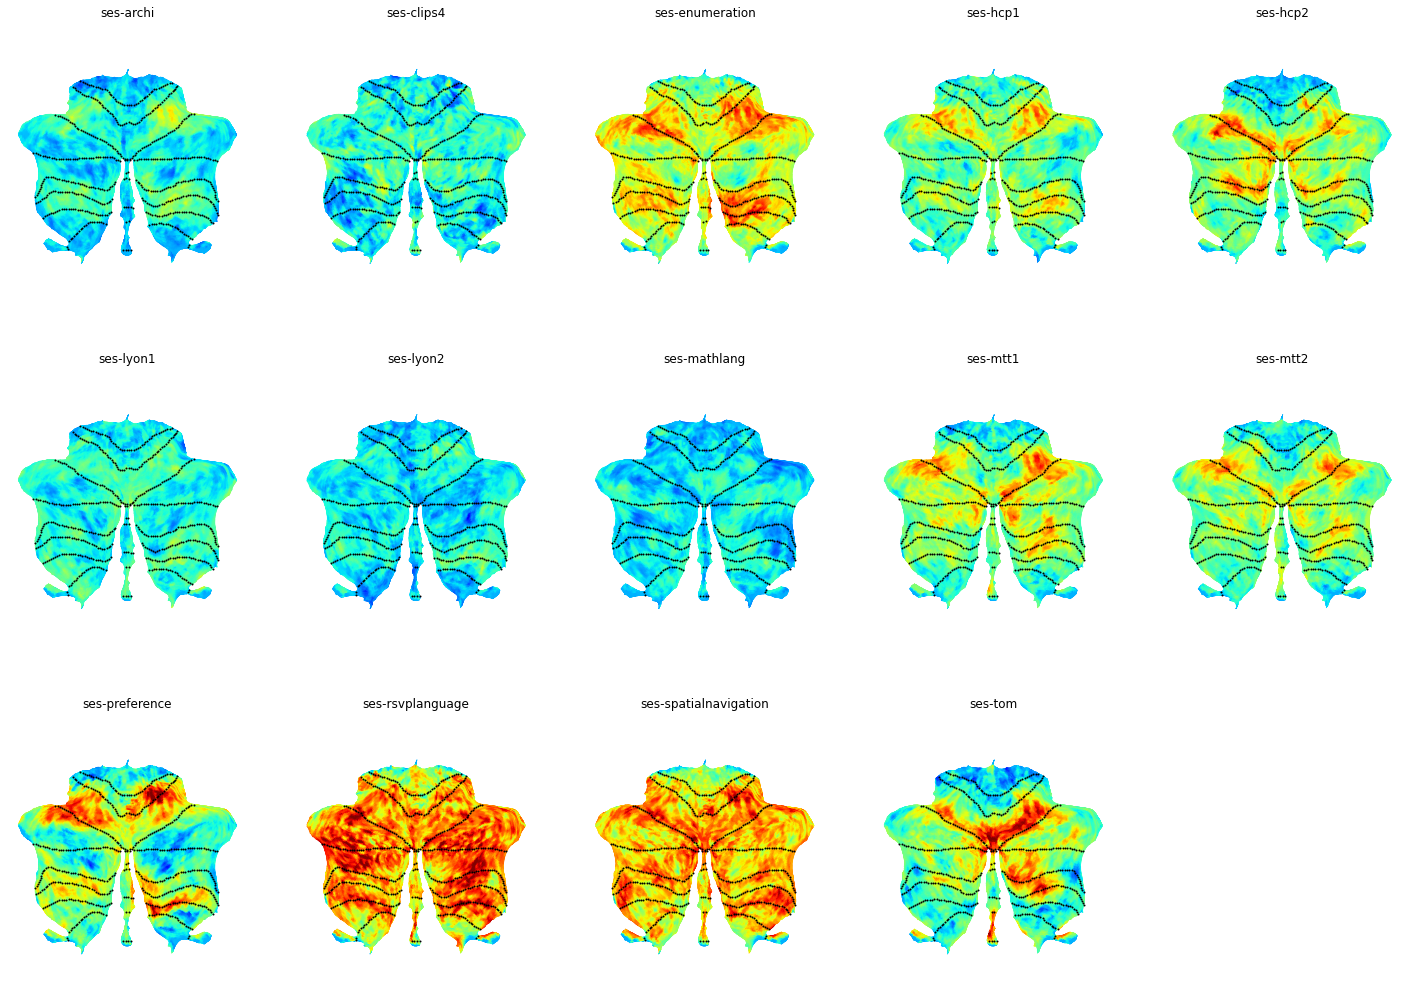

In [21]:
rel, sess = reliability_maps(base_dir, 'IBC', subtract_mean=False, voxel_wise=True)
plt.figure(figsize=(25, 18))
plot_multi_flat(rel, 'MNISymC3', grid=(3, 5), dtype='func',
                cscale=[-0.3, 0.7], colorbar=False, titles=sess)

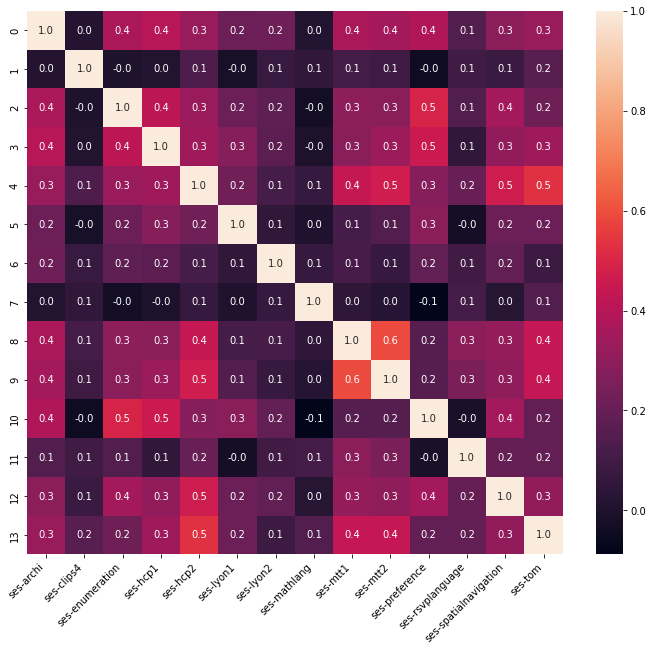

In [27]:
# 1. Get session-similarity between all 14 seesions
rel, sess = reliability_maps(base_dir, 'IBC', subtract_mean=False, voxel_wise=True)
ses_cor = np.corrcoef(rel)

plt.figure(figsize=(12,10))
ax = sb.heatmap(ses_cor, annot=True, fmt=".1f")
a = ax.set_xticklabels(sess, rotation=45,horizontalalignment='right')

### The two sessions fusion - overall trend (without relevant/irrelevant)

D:\python_workspace\Functional_Fusion\dataset.py:390: UserWarning: sub-11, ses-preference, CondHalf - missing data painting_constant-half2
  warnings.warn(f'{s}, {ses_id}, {type} - missing data {base[j]}')
D:\python_workspace\Functional_Fusion\dataset.py:217: RuntimeWarning: invalid value encountered in true_divide
  r[s,pn,:] = nansum(X1*X2,axis=0)/ \
D:\python_workspace\Functional_Fusion\dataset.py:390: UserWarning: sub-11, ses-preference, CondHalf - missing data painting_constant-half2
  warnings.warn(f'{s}, {ses_id}, {type} - missing data {base[j]}')


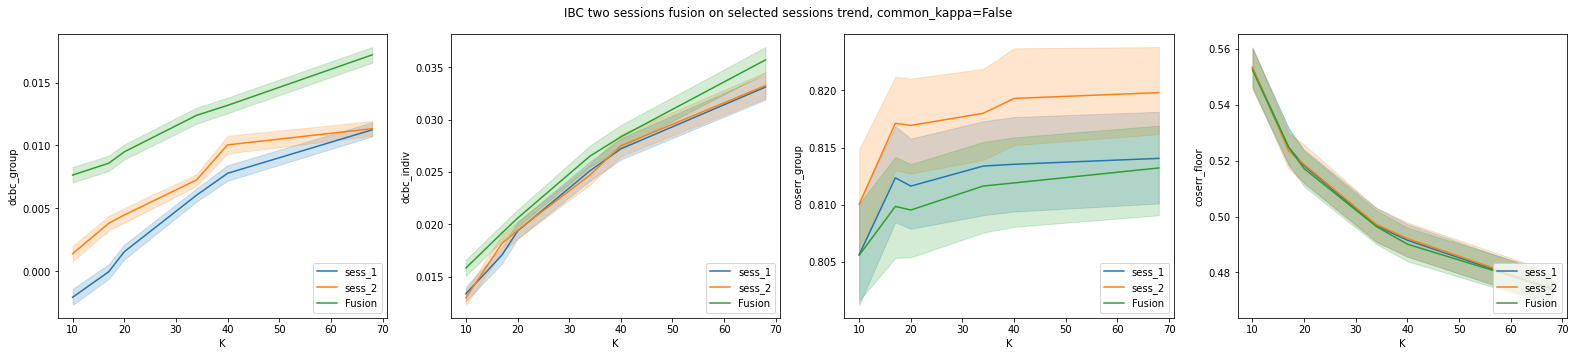

In [1]:
from ProbabilisticParcellation.scripts.modeling_3 import *
fname = f'/Models/Evaluation/eval_asym_train-Ib_twoSess_test-leftOutSess.tsv'
# result_3_rel_check(fname)
result_3_plot(fname, ck=False, style=None, print_relevancy=False)

### The two sessions fusion - triaged by relevant/irrelevant (to be discussed how to triage?)

D:\python_workspace\Functional_Fusion\dataset.py:390: UserWarning: sub-11, ses-preference, CondHalf - missing data painting_constant-half2
  warnings.warn(f'{s}, {ses_id}, {type} - missing data {base[j]}')
D:\python_workspace\Functional_Fusion\dataset.py:217: RuntimeWarning: invalid value encountered in true_divide
  r[s,pn,:] = nansum(X1*X2,axis=0)/ \
D:\python_workspace\Functional_Fusion\dataset.py:390: UserWarning: sub-11, ses-preference, CondHalf - missing data painting_constant-half2
  warnings.warn(f'{s}, {ses_id}, {type} - missing data {base[j]}')


relevant sessions: ses-archi and ses-hcp1
irrelevant sessions: ses-clips4 and ses-enumeration
irrelevant sessions: ses-clips4 and ses-lyon1
irrelevant sessions: ses-clips4 and ses-preference
relevant sessions: ses-enumeration and ses-hcp1
irrelevant sessions: ses-enumeration and ses-mathlang
relevant sessions: ses-enumeration and ses-preference
irrelevant sessions: ses-hcp1 and ses-mathlang
relevant sessions: ses-hcp1 and ses-preference
relevant sessions: ses-hcp2 and ses-mtt1
relevant sessions: ses-hcp2 and ses-mtt2
relevant sessions: ses-hcp2 and ses-spatialnavigation
relevant sessions: ses-hcp2 and ses-tom
irrelevant sessions: ses-lyon1 and ses-rsvplanguage
irrelevant sessions: ses-mathlang and ses-preference
relevant sessions: ses-mtt1 and ses-mtt2
relevant sessions: ses-mtt1 and ses-tom
relevant sessions: ses-mtt2 and ses-tom
irrelevant sessions: ses-preference and ses-rsvplanguage


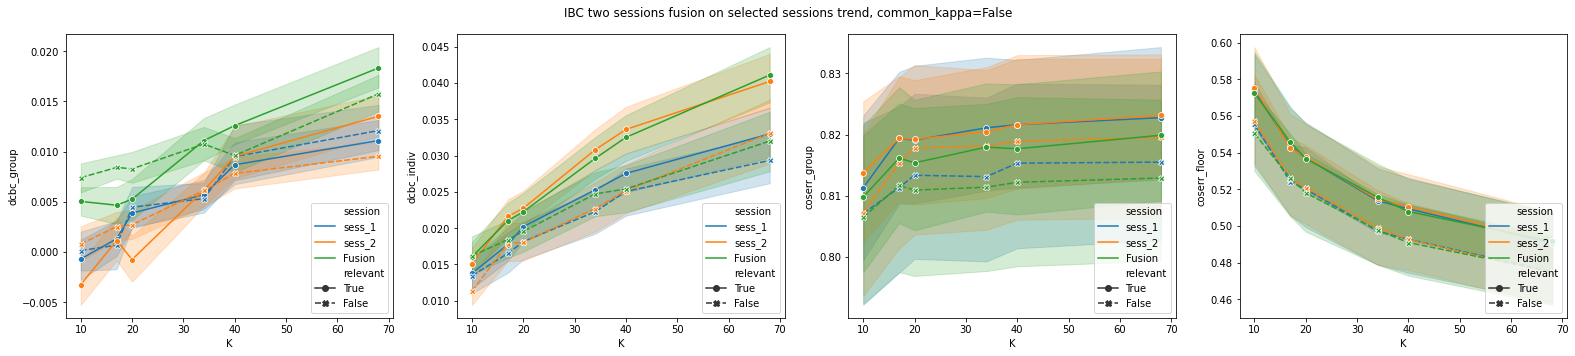

In [2]:
from ProbabilisticParcellation.scripts.modeling_3 import *
fname = f'/Models/Evaluation/eval_asym_train-Ib_twoSess_test-leftOutSess.tsv'
result_3_plot(fname, ck=False, style='relevant', style_order=[True, False], print_relevancy=True)

### The session performance is not correlated to session reliability (Show this if anyone asked)

Sometime, we thought a good session should also perform well in terms of evaluation metric or parcellation quality. To testify this assumption, we classified IBC individual sessions quiality by their reliability (the within-subject correlation across runs in each session). A higher reliability value indicates this is a good session. Here we plot the relationship between reliability value of sessions with the session performance (evaluation metrics). And the plot shows that the session reliability is nothing to do with its performance. **This is also the evidence that why sometimes the `sess_1` higher or below `sess_2`, or there's a cross in the evaluation graph.**

D:\python_workspace\Functional_Fusion\dataset.py:390: UserWarning: sub-11, ses-preference, CondHalf - missing data painting_constant-half2
  warnings.warn(f'{s}, {ses_id}, {type} - missing data {base[j]}')


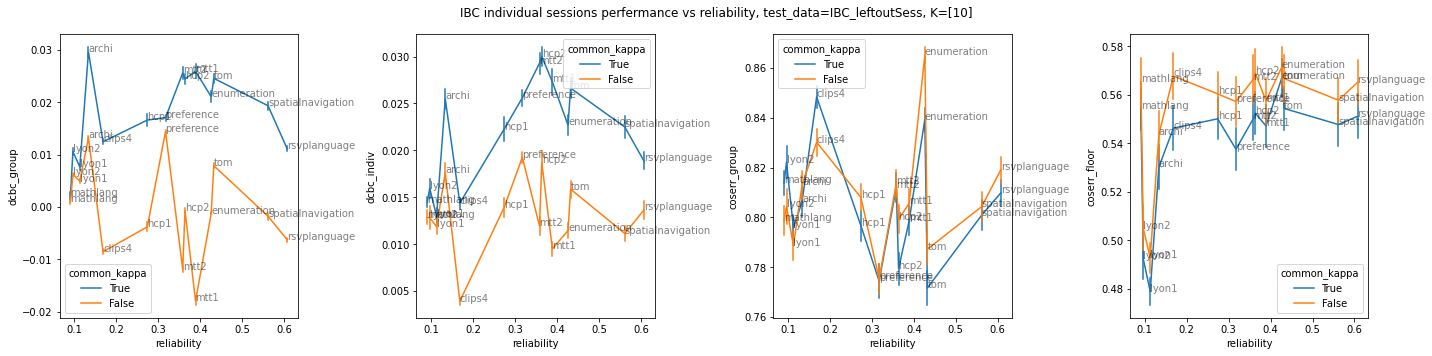

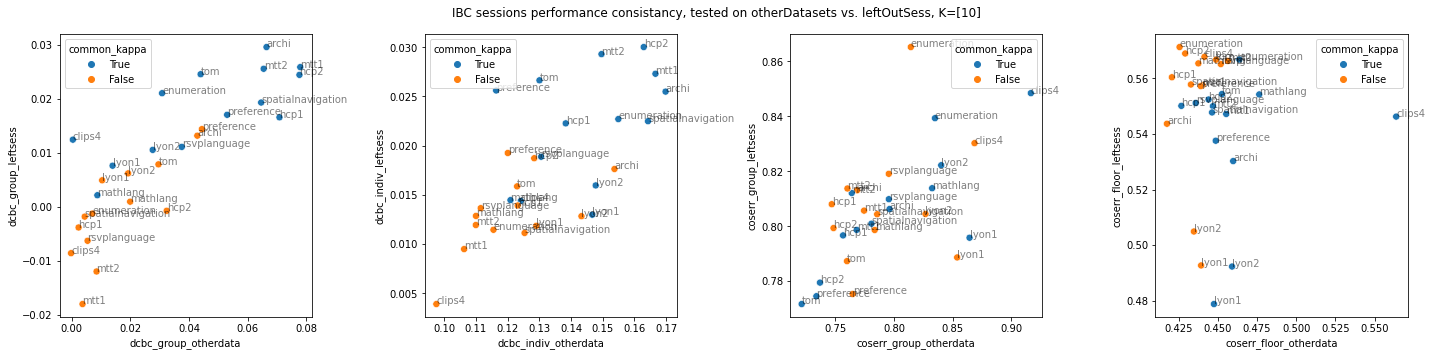

In [3]:
from ProbabilisticParcellation.scripts.modeling_3 import *
fname = f'/Models/Evaluation/eval_asym_train-Ib_twoSess_test-leftOutSess.tsv'
result_3_rel_check(fname, K=[10])
plot_IBC_performance_reliability(K=[10])

### Some example fusion maps

**Two relevant sessions**

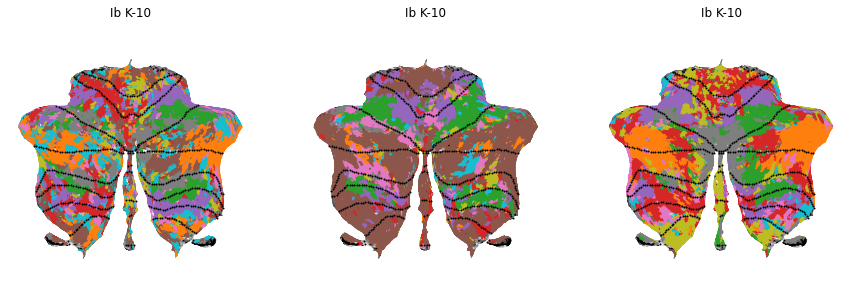

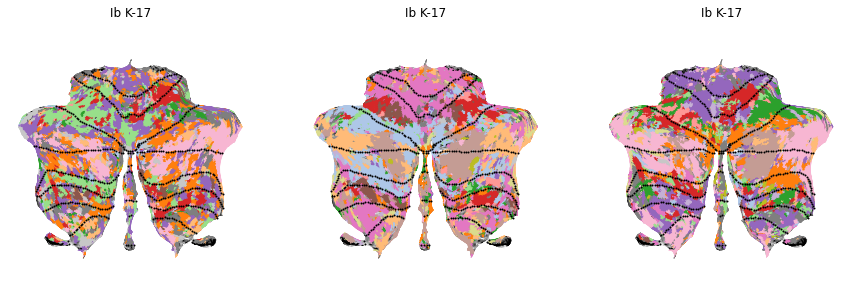

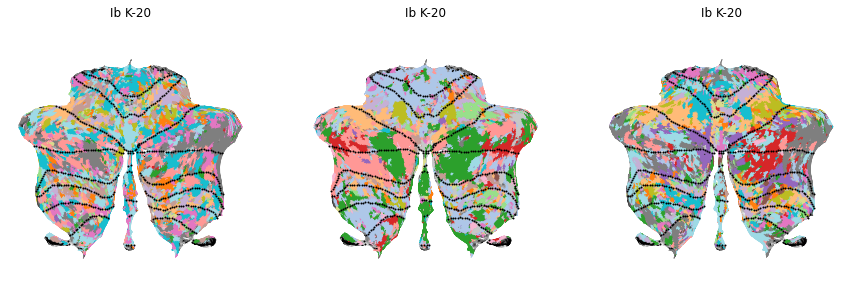

In [8]:
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')

plt.figure(figsize=(15, 5))
plot_model_parcel(['Models_04/asym_Ib_space-MNISymC3_K-10_ses-archi',
                   'Models_04/asym_Ib_space-MNISymC3_K-10_ses-hcp1',
                   'Models_04/IBC_sessFusion/asym_Ib_space-MNISymC3_K-10_ses-spatialnavigation+tom'], 
                  [1,3], cmap='tab10', align=True, device='cuda')

plt.figure(figsize=(15, 5))
plot_model_parcel(['Models_04/asym_Ib_space-MNISymC3_K-17_ses-preference',
                   'Models_04/asym_Ib_space-MNISymC3_K-17_ses-hcp1',
                   'Models_04/IBC_sessFusion/asym_Ib_space-MNISymC3_K-17_ses-hcp1+preference'], 
                  [1,3], cmap='tab20', align=True, device='cuda')

plt.figure(figsize=(15, 5))
plot_model_parcel(['Models_04/asym_Ib_space-MNISymC3_K-20_ses-preference',
                   'Models_04/asym_Ib_space-MNISymC3_K-20_ses-hcp1',
                   'Models_04/IBC_sessFusion/asym_Ib_space-MNISymC3_K-20_ses-hcp1+preference'], 
                  [1,3], cmap='tab20', align=True, device='cuda')

**Two irrelevant sessions**

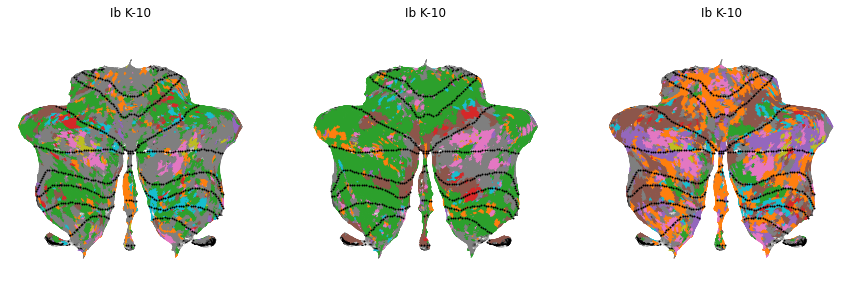

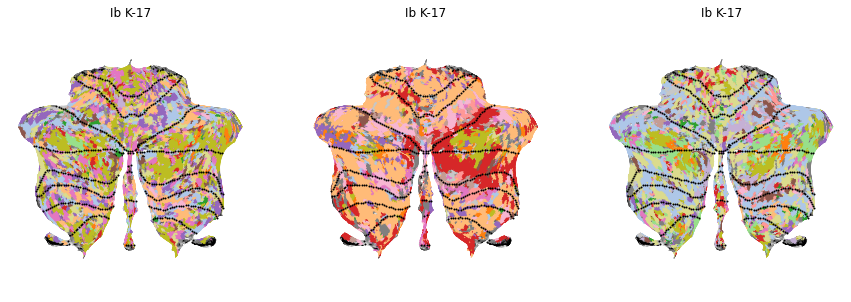

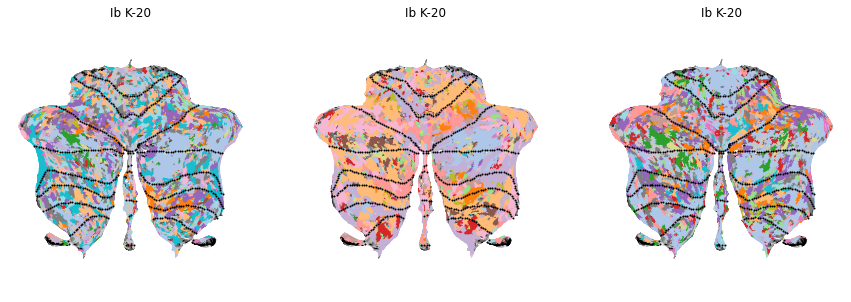

In [7]:
plt.figure(figsize=(15, 5))
plot_model_parcel(['Models_04/asym_Ib_space-MNISymC3_K-10_ses-enumeration',
                   'Models_04/asym_Ib_space-MNISymC3_K-10_ses-mathlang',
                   'Models_04/IBC_sessFusion/asym_Ib_space-MNISymC3_K-10_ses-enumeration+mathlang'], 
                  [1,3], cmap='tab10', align=True, device='cuda')

plt.figure(figsize=(15, 5))
plot_model_parcel(['Models_04/asym_Ib_space-MNISymC3_K-17_ses-enumeration',
                   'Models_04/asym_Ib_space-MNISymC3_K-17_ses-mathlang',
                   'Models_04/IBC_sessFusion/asym_Ib_space-MNISymC3_K-17_ses-enumeration+mathlang'], 
                  [1,3], cmap='tab20', align=True, device='cuda')

plt.figure(figsize=(15, 5))
plot_model_parcel(['Models_04/asym_Ib_space-MNISymC3_K-20_ses-enumeration',
                   'Models_04/asym_Ib_space-MNISymC3_K-20_ses-mathlang',
                   'Models_04/IBC_sessFusion/asym_Ib_space-MNISymC3_K-20_ses-enumeration+mathlang'], 
                  [1,3], cmap='tab20', align=True, device='cuda')

## 4. IBC 14 individual sessions vs. all sessions fusion (tested on other datasets)

First, we visualize the model fitting result of all individual sessions plus all sesisons fusion map.

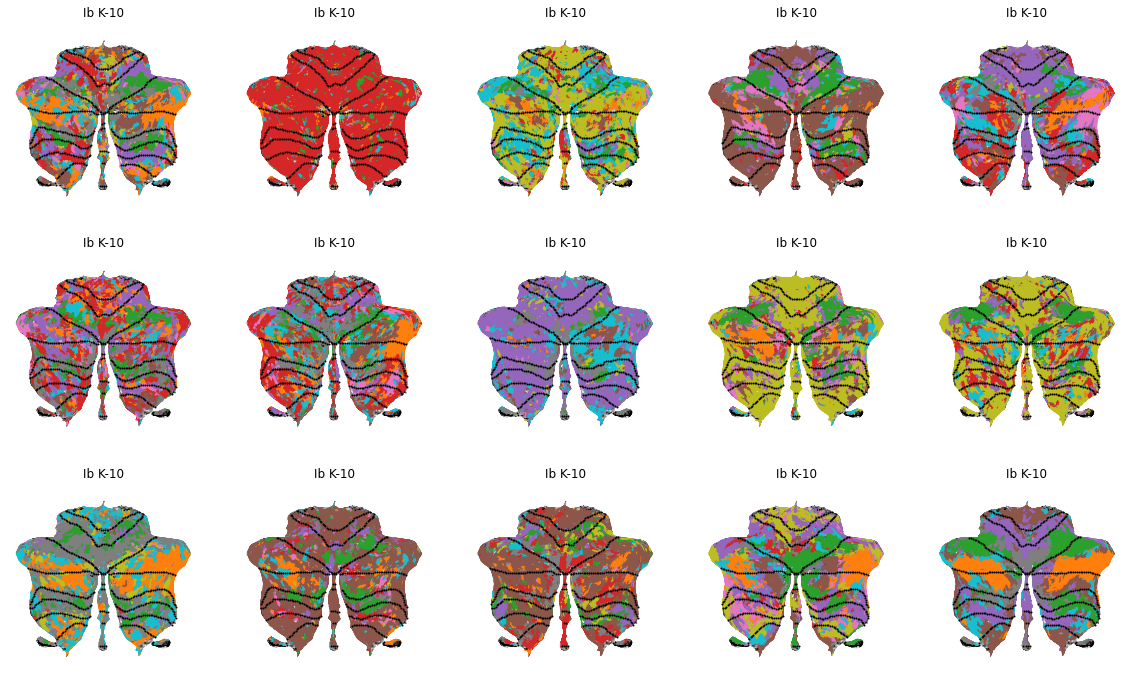

In [9]:
plt.figure(figsize=(20, 12))
sess = DataSetIBC(base_dir + '/IBC').sessions

model_names = [f'Models_04/asym_Ib_space-MNISymC3_K-10_{s}' for s in sess]
plot_model_parcel(model_names+[f'Models_04/asym_Ib_space-MNISymC3_K-10'],
                  [3,5], cmap='tab10', align=True, device='cuda')

Then, we show the evaluation metric of individual sessions and sessions fusion tested on other **clean datasets**

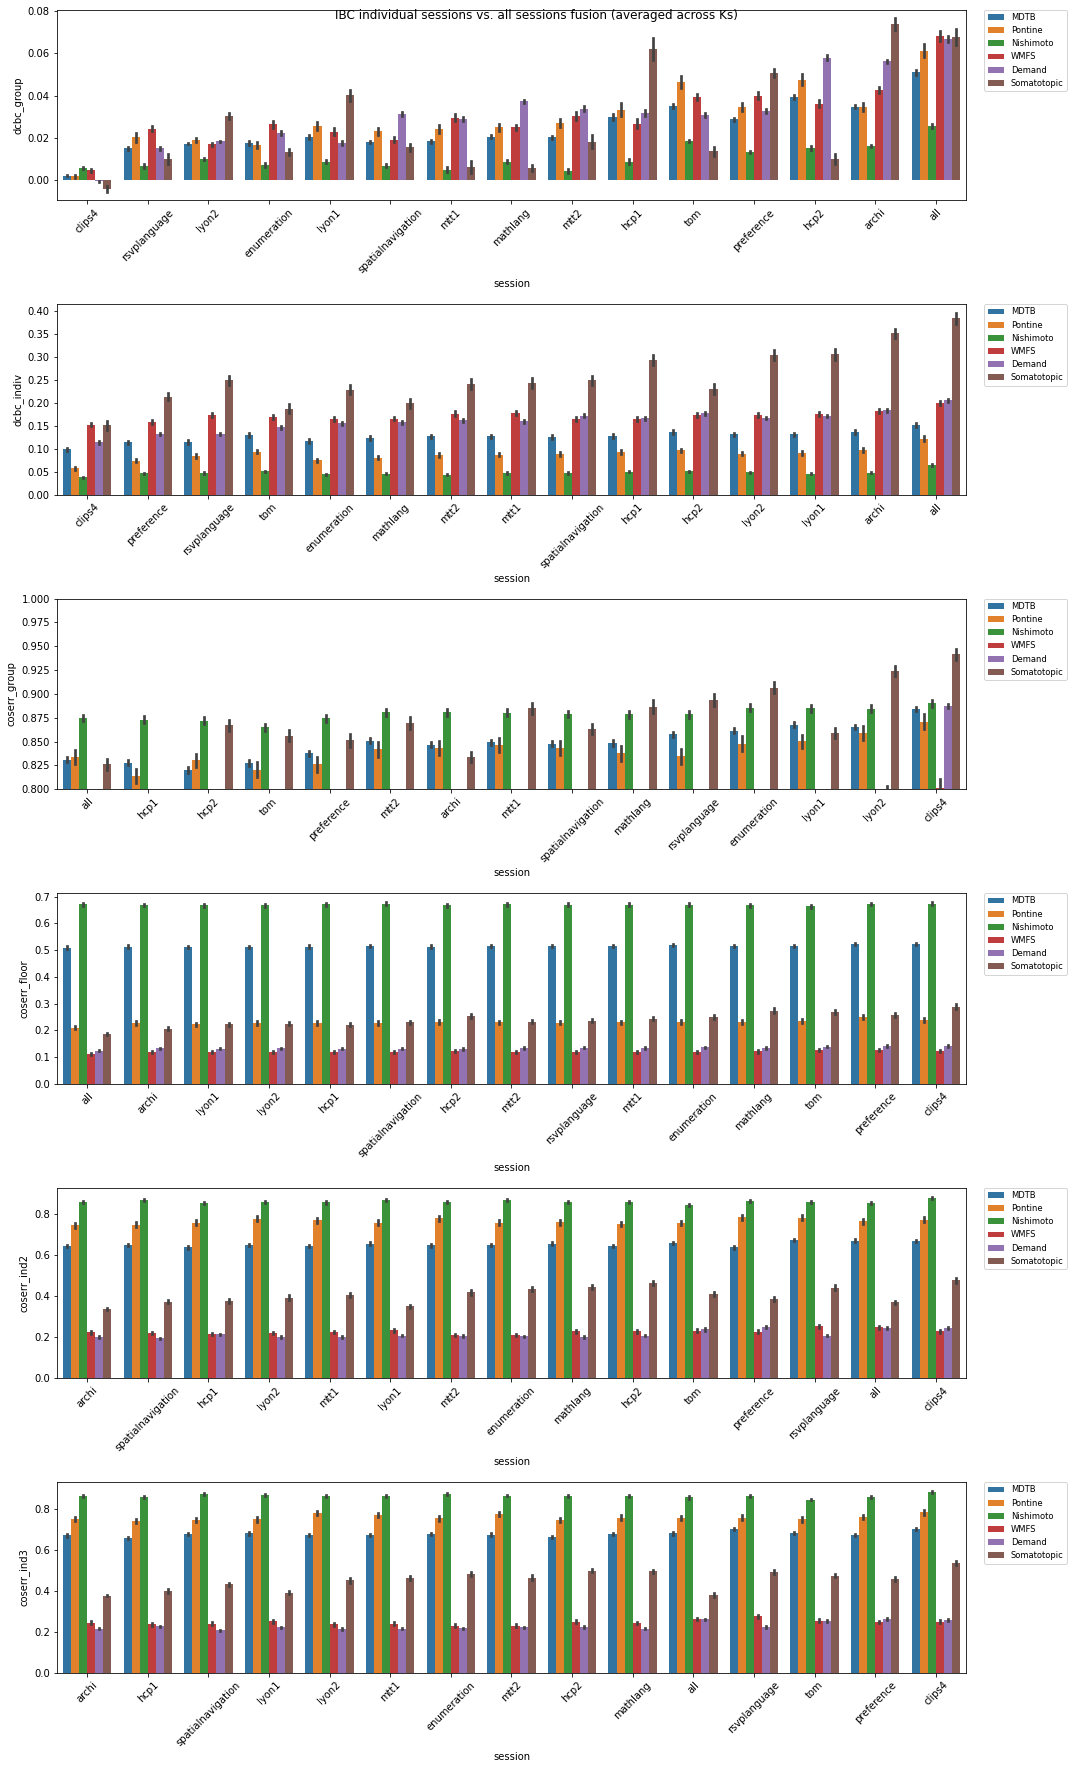

In [17]:
D = pd.read_csv(model_dir + '/Models/Evaluation/eval_all_asym_Ib_K-10_to_68_indivSess_on_otherDatasets.tsv',sep='\t')
orderby = None
D = D.loc[(D.common_kappa == False)]

plt.figure(figsize=(15,25))
crits = ['dcbc_group','dcbc_indiv','coserr_group','coserr_floor','coserr_ind2','coserr_ind3']
for i, c in enumerate(crits):
    plt.subplot(6, 1, i + 1)
    if orderby is not None:
        order = D.loc[(D['common_kappa'] == True)].groupby('session')[c].mean().sort_values().keys().to_list()
    else:
        order = D.groupby('session')[c].mean().sort_values().keys().to_list()
    sb.barplot(data=D, x='session', y=c, order=order, hue='test_data',
               hue_order=D.test_data.unique(), errorbar="se")
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='small')
    if c == 'coserr_group':
        plt.ylim(0.8, 1.0)
#     if c == 'coserr_floor':
#         plt.ylim(0.4, 0.8)

plt.suptitle(f'IBC individual sessions vs. all sessions fusion (averaged across Ks)')
plt.tight_layout()

# ax = sb.barplot(data=D,y='dcbc_group',x='D',hue='common_kappa', hue_order=D["common_kappa"].unique())
# a=ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')

## 5. All datasets fusion

### 1. Individual datasets vs. all datasets fusion tested on each individual datasets (Overfitting)

**Result is averaged across all K = [10,17,20,34,40,68]**

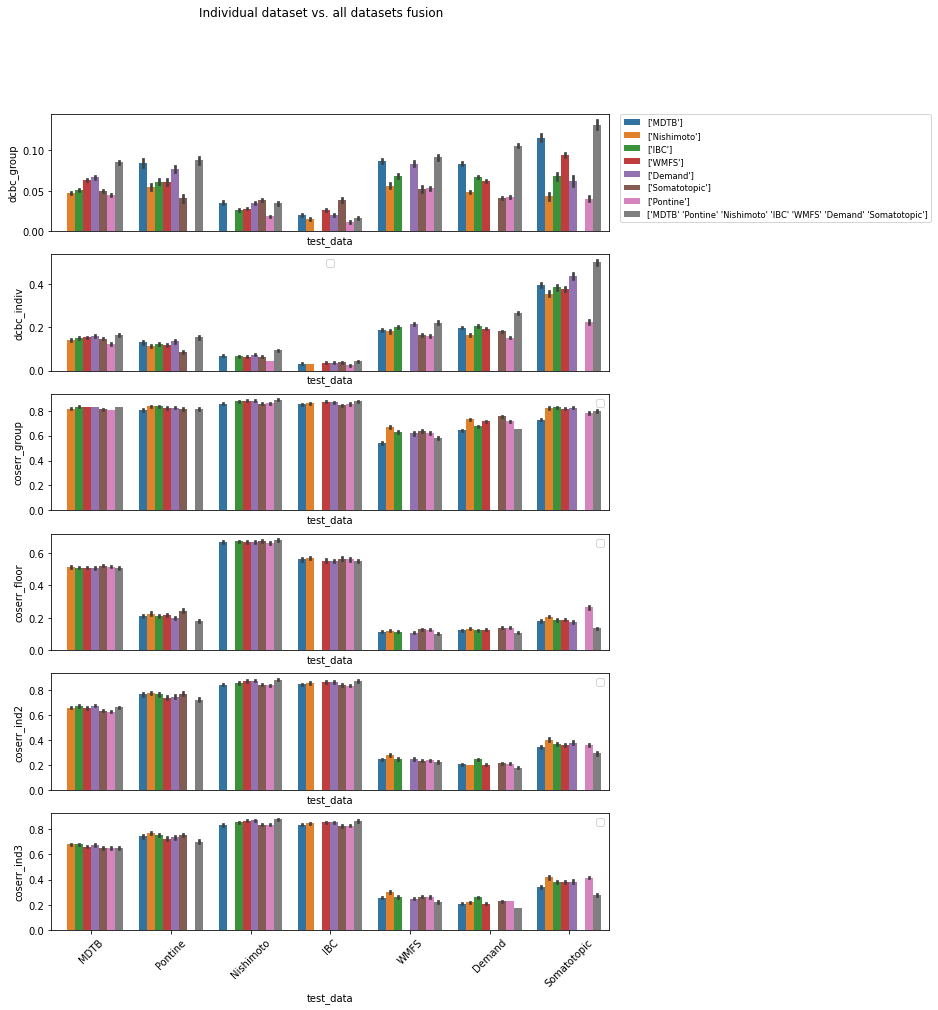

In [18]:
fname = f'/Models/Evaluation/eval_dataset7_asym.tsv'

D = pd.read_csv(model_dir + fname, delimiter='\t')
df = D.loc[(D['model_type'] == 'Models_04')]
crits = ['dcbc_group','dcbc_indiv','coserr_group',
         'coserr_floor','coserr_ind2','coserr_ind3']

plt.figure(figsize=(10, 15))
for i, c in enumerate(crits):
    plt.subplot(6, 1, i + 1)
    sb.barplot(data=df, x='test_data', y=c, hue='train_data', hue_order=["['MDTB']", "['Nishimoto']", "['IBC']", 
                                                                         "['WMFS']", "['Demand']","['Somatotopic']",
                                                                         "['Pontine']","['MDTB' 'Pontine' 'Nishimoto' 'IBC' 'WMFS' 'Demand' 'Somatotopic']"], errorbar="se")
    
    # plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='small')
    if i == len(crits)-1:
        plt.xticks(rotation=45)
    else:
        plt.xticks([])
    
    if i == 0:
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='small')
    else:
        plt.legend("")
    # if 'coserr' in c:
    #     plt.ylim(0.4, 1)

plt.suptitle(f'Individual dataset vs. all datasets fusion')
plt.show()

### 2. Fusion (leave-one-dataset-out) tested on the leftout dataset

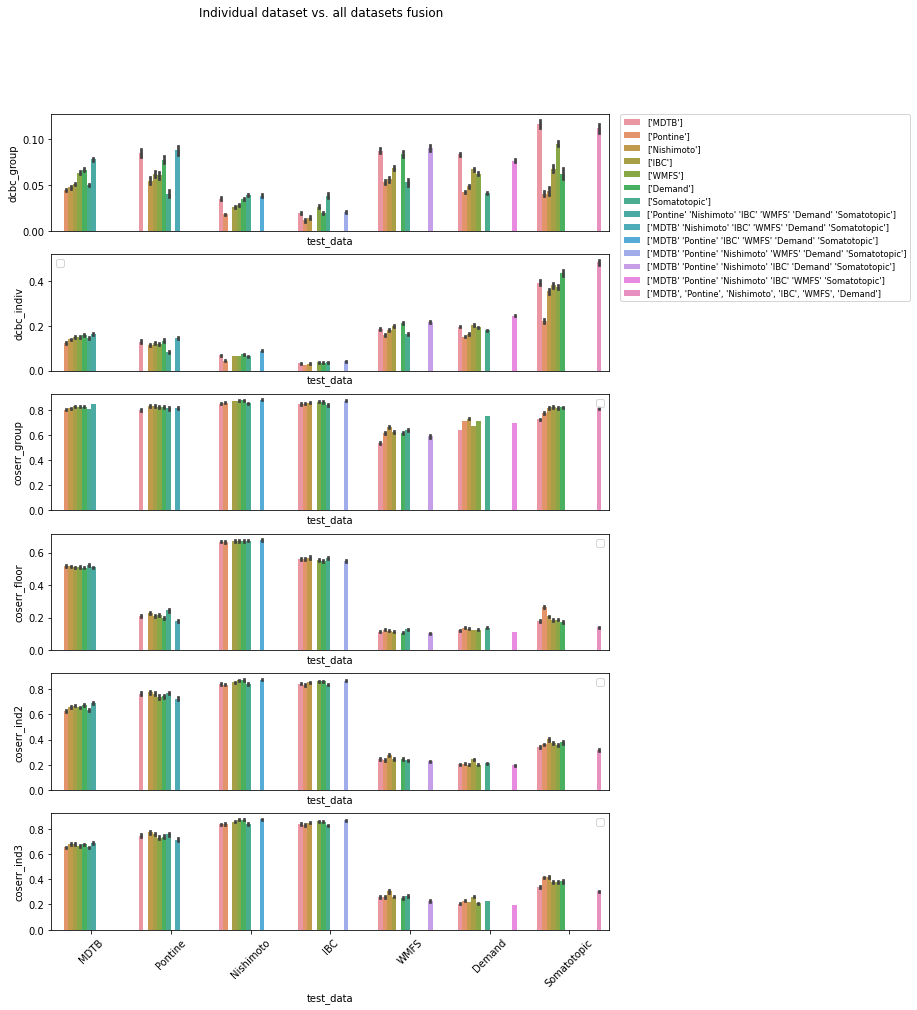

In [19]:
fname = f'/Models/Evaluation/eval_dataset7_asym.tsv'

indiv_datasets = ["['MDTB']","['Pontine']","['Nishimoto']","['IBC']","['WMFS']","['Demand']","['Somatotopic']"]

train_datasets = ["['Pontine' 'Nishimoto' 'IBC' 'WMFS' 'Demand' 'Somatotopic']",
                  "['MDTB' 'Nishimoto' 'IBC' 'WMFS' 'Demand' 'Somatotopic']",
                  "['MDTB' 'Pontine' 'IBC' 'WMFS' 'Demand' 'Somatotopic']",
                  "['MDTB' 'Pontine' 'Nishimoto' 'WMFS' 'Demand' 'Somatotopic']",
                  "['MDTB' 'Pontine' 'Nishimoto' 'IBC' 'Demand' 'Somatotopic']",
                  "['MDTB' 'Pontine' 'Nishimoto' 'IBC' 'WMFS' 'Somatotopic']",
                  "['MDTB', 'Pontine', 'Nishimoto', 'IBC', 'WMFS', 'Demand']"]
    
D = pd.read_csv(model_dir + fname, delimiter='\t')
df = D.loc[(D['model_type'] == 'Models_04') & (D['train_data'] != "['MDTB' 'Pontine' 'Nishimoto' 'IBC' 'WMFS' 'Demand' 'Somatotopic']")]
crits = ['dcbc_group','dcbc_indiv','coserr_group',
         'coserr_floor','coserr_ind2','coserr_ind3']

plt.figure(figsize=(10, 15))
for i, c in enumerate(crits):
    plt.subplot(6, 1, i + 1)
    sb.barplot(data=df, x='test_data', order=['MDTB', 'Pontine', 'Nishimoto', 'IBC', 'WMFS', 'Demand','Somatotopic'],
               y=c, hue='train_data', hue_order=indiv_datasets+train_datasets, errorbar="se")
    
    # plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='small')
    if i == len(crits)-1:
        plt.xticks(rotation=45)
    else:
        plt.xticks([])
    
    if i == 0:
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='small')
    else:
        plt.legend("")
    # if 'coserr' in c:
    #     plt.ylim(0.4, 1)

plt.suptitle(f'Individual dataset vs. all datasets fusion')
plt.show()